# Исследование статистики чемпионата мира по автогонкам класса Формулы-1 с 1950 по 2017 год

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt 
import matplotlib.mlab as mlab
import matplotlib.style as style
%matplotlib inline
style.use('seaborn')

## Краткое описание датасета, который используется в исследовании

### Список всех сезонов Формулы-1 по годам

In [2]:
seasons = pd.read_csv('formula1/f1_seasons.csv')
seasons.head(5)

,year,url
0,2009,http://en.wikipedia.org/wiki/2009_Formula_One_...
1,2008,http://en.wikipedia.org/wiki/2008_Formula_One_...
2,2007,http://en.wikipedia.org/wiki/2007_Formula_One_...
3,2006,http://en.wikipedia.org/wiki/2006_Formula_One_...
4,2005,http://en.wikipedia.org/wiki/2005_Formula_One_...


### Список всех гонок Формулы-1

In [3]:
races = pd.read_csv('formula1/f1_races.csv')
races.head(5)

,year,round,name,circuit,date,time,url
0,2009,1,Australian Grand Prix,Albert Park Grand Prix Circuit,2009-03-29,06:00:00,http://en.wikipedia.org/wiki/2009_Australian_G...
1,2009,2,Malaysian Grand Prix,Sepang International Circuit,2009-04-05,09:00:00,http://en.wikipedia.org/wiki/2009_Malaysian_Gr...
2,2009,3,Chinese Grand Prix,Shanghai International Circuit,2009-04-19,07:00:00,http://en.wikipedia.org/wiki/2009_Chinese_Gran...
3,2009,4,Bahrain Grand Prix,Bahrain International Circuit,2009-04-26,12:00:00,http://en.wikipedia.org/wiki/2009_Bahrain_Gran...
4,2009,5,Spanish Grand Prix,Circuit de Barcelona-Catalunya,2009-05-10,12:00:00,http://en.wikipedia.org/wiki/2009_Spanish_Gran...


### Список всех гонщиков Формулы-1

In [4]:
drivers = pd.read_csv('formula1/f1_drivers.csv')
drivers.head(5)

,driverId,driverRef,number,code,forename,surname,dob,nationality,url
0,1,hamilton,44.0,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
1,2,heidfeld,NaN,HEI,Nick,Heidfeld,1977-05-10,German,http://en.wikipedia.org/wiki/Nick_Heidfeld
2,3,rosberg,6.0,ROS,Nico,Rosberg,1985-06-27,German,http://en.wikipedia.org/wiki/Nico_Rosberg
3,4,alonso,14.0,ALO,Fernando,Alonso,1981-07-29,Spanish,http://en.wikipedia.org/wiki/Fernando_Alonso
4,5,kovalainen,NaN,KOV,Heikki,Kovalainen,1981-10-19,Finnish,http://en.wikipedia.org/wiki/Heikki_Kovalainen


### Список всех трасс Формулы-1

In [5]:
circuits = pd.read_csv('formula1/f1_circuits.csv')
circuits.head(5)

,circuitId,circuitRef,name,location,country,lat,lng,alt,url
0,1,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.84970,144.96800,10.0,http://en.wikipedia.org/wiki/Melbourne_Grand_P...
1,2,sepang,Sepang International Circuit,Kuala Lumpur,Malaysia,2.76083,101.73800,NaN,http://en.wikipedia.org/wiki/Sepang_Internatio...
2,3,bahrain,Bahrain International Circuit,Sakhir,Bahrain,26.03250,50.51060,NaN,http://en.wikipedia.org/wiki/Bahrain_Internati...
3,4,catalunya,Circuit de Barcelona-Catalunya,Montmeló,Spain,41.57000,2.26111,NaN,http://en.wikipedia.org/wiki/Circuit_de_Barcel...
4,5,istanbul,Istanbul Park,Istanbul,Turkey,40.95170,29.40500,NaN,http://en.wikipedia.org/wiki/Istanbul_Park


### Результаты всех гонок Формулы-1

In [6]:
results = pd.read_csv('formula1/f1_results.csv')
results.head(5)

,round,race,circuit,year,driver,driverRef,constructor,number,grid,position,points,laps,time,fastestLap,fastestLapTime,fastestLapSpeed,status
0,1,Australian Grand Prix,Albert Park Grand Prix Circuit,2009,Jenson Button,button,Brawn,22.0,1,1,10.0,58,1:34:15.784,17.0,1:28.020,216.891,Finished
1,1,Australian Grand Prix,Albert Park Grand Prix Circuit,2009,Rubens Barrichello,barrichello,Brawn,23.0,2,2,8.0,58,+0.807,43.0,1:29.066,214.344,Finished
2,1,Australian Grand Prix,Albert Park Grand Prix Circuit,2009,Jarno Trulli,trulli,Toyota,9.0,20,3,6.0,58,+1.604,50.0,1:28.916,214.706,Finished
3,1,Australian Grand Prix,Albert Park Grand Prix Circuit,2009,Timo Glock,glock,Toyota,10.0,19,4,5.0,58,+4.435,53.0,1:28.416,215.920,Finished
4,1,Australian Grand Prix,Albert Park Grand Prix Circuit,2009,Fernando Alonso,alonso,Renault,7.0,10,5,4.0,58,+4.879,53.0,1:28.712,215.199,Finished


### Положение пилота в чемпионате после каждого Гранд-при¶

In [7]:
driver_standings = pd.read_csv('formula1/f1_driver_standings.csv')
driver_standings.head(5)

,round,race,circuit,city,country,year,driver,driverRef,points,position
0,1,Australian Grand Prix,Albert Park Grand Prix Circuit,Melbourne,Australia,2009,Jenson Button,button,10.0,1
1,1,Australian Grand Prix,Albert Park Grand Prix Circuit,Melbourne,Australia,2009,Rubens Barrichello,barrichello,8.0,2
2,1,Australian Grand Prix,Albert Park Grand Prix Circuit,Melbourne,Australia,2009,Jarno Trulli,trulli,6.0,3
3,1,Australian Grand Prix,Albert Park Grand Prix Circuit,Melbourne,Australia,2009,Timo Glock,glock,5.0,4
4,1,Australian Grand Prix,Albert Park Grand Prix Circuit,Melbourne,Australia,2009,Fernando Alonso,alonso,4.0,5


## Первый вопрос который меня интересует - это географическое распределение этапов чемпионата мира

### Для того, чтобы ответить на этот вопрос используем тепловую карту и библиотеку folium

In [8]:
import folium
from folium import plugins

In [9]:
races_coords = races.merge(circuits, left_on='circuit', right_on='name', how='left') \
    .groupby(['circuit', 'lat', 'lng'])['circuit'].agg(['count']) \
    .sort_values('count', ascending=False) \
    .reset_index()
races_coords = races_coords.rename(columns={'count':'races'})
races_coords.head(5)

,circuit,lat,lng,races
0,Autodromo Nazionale di Monza,45.6156,9.28111,67
1,Circuit de Monaco,43.7347,7.42056,64
2,Silverstone Circuit,52.0786,-1.01694,51
3,Circuit de Spa-Francorchamps,50.4372,5.97139,50
4,Nürburgring,50.3356,6.94750,40


In [10]:
m = folium.Map([48., 5.], zoom_start=2)

data = []
for index, row in races_coords.iterrows():
    data.append([row['lat'], row['lng'], row['races']])

plugins.HeatMap(data).add_to(m)

m

Как видно, наибольший интерес для чемпионата представляет Западная Европа и Северная Америка. В первом случае объяснение довольно простое: вплоть до середины 80-х годов, большая часть гонок чемпионата проходила именно там. Во втором случае, наиболее логичное объяснение, то что Северная Америка всегда являлась наиболее привлекательным рынком как для автопроизводителей так и для спонсоров, поэтому Ф-1 всячески стремилась туда попасть.

## Второй вопрос который меня интересует - это распределение возраста гонщиков¶

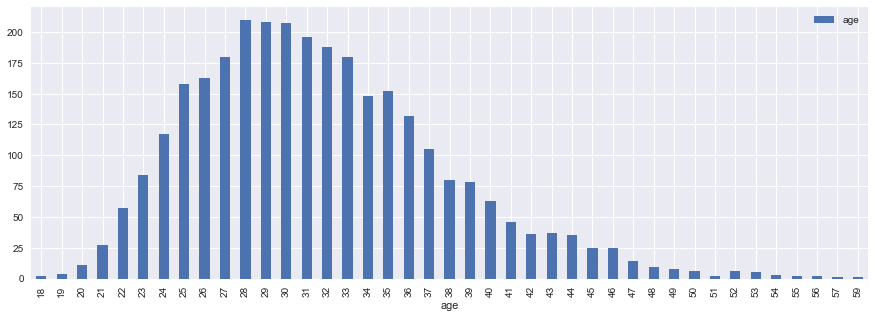

In [11]:
drivers_during_the_season = driver_standings[['round', 'year', 'driver', 'driverRef']][driver_standings.year < 2017] \
    .drop_duplicates(subset=['year', 'driverRef'])
drivers_during_the_season = drivers_during_the_season.merge(drivers, on='driverRef', how='inner')[
    ['year', 'driver', 'driverRef', 'dob', 'nationality']
]

drivers_during_the_season = drivers_during_the_season[drivers_during_the_season.dob.notnull()]

drivers_during_the_season['dob'] = drivers_during_the_season['dob'].apply(lambda x: int(x.split('-')[0]))
drivers_during_the_season['age'] = drivers_during_the_season['year'] - drivers_during_the_season['dob']

drivers_during_the_season.groupby('age')['age'].count().plot.bar(figsize=(15, 5), legend=True);

Как видно, "золотой возраст" для гонщика от 27 до 33 лет, но я считаю это исследование не до конца полным, так как не известно насколько менялся средний возраст гонщика. Поэтому построим и этот график.

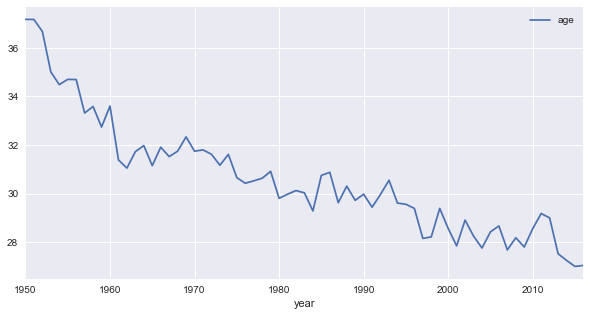

In [12]:
drivers_during_the_season.groupby('year')['age'].mean().plot(figsize=(10, 5), legend=True);

Как видно, за все время существования чемпионата, средний возраст значительно уменьшился, поэтому имеет смысл сравнить рапределения возраста за первые 20 лет существования чемпионата и последние 20 лет. 

In [13]:
first_20_years = drivers_during_the_season[drivers_during_the_season.year < 1970][['driverRef', 'age', 'year']]
first_20_years['period'] = 'First 20 years'
last_20_years = drivers_during_the_season[drivers_during_the_season.year > 2001][['driverRef', 'age', 'year']]
last_20_years['period'] = 'Last 20 years'
data = pd.concat([first_20_years, last_20_years], ignore_index=True)
data = data.pivot_table('driverRef', index=['age'], columns=['period'], aggfunc='count').fillna(0).reset_index()
data.head(10)

period,age,First 20 years,Last 20 years
0,18,1.0,1.0
1,19,1.0,2.0
2,20,3.0,4.0
3,21,9.0,9.0
4,22,15.0,21.0
5,23,18.0,29.0
6,24,41.0,29.0
7,25,54.0,29.0
8,26,64.0,31.0
9,27,59.0,28.0


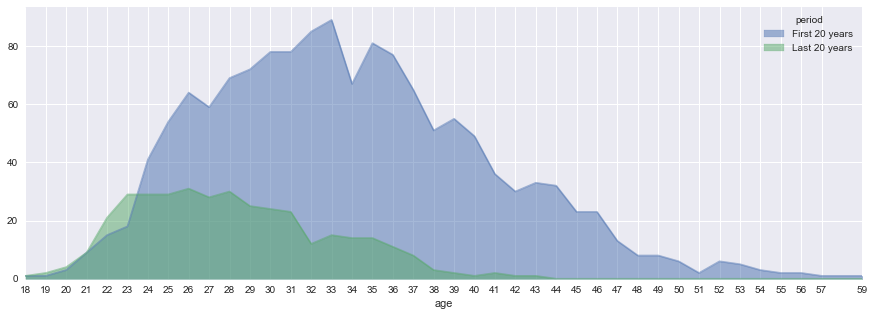

In [14]:
data.plot.area(x='age', figsize=(15, 5), stacked=False, xticks=data.age);

Как видно, в первые 20 лет существования чемпионата возраст гонщика играл не столь важную роль и наиболее продуктивные годы был 26-37 лет, а гонщики старше 40-ка лет не являлись такой уж редкостью. В современную эпоху это значение сместилось в сторону 22-32 года и гонщиков старше 40-ка осталось буквально единицы. Это можно объяснить возросшей ролью физической подготовки спортсменов, а также тем, что профессиональная подготовка многих спортсменов сейчас начинается гораздо раньше.
Также на этом графике видно, насколько стабильнее стал состав участников чемпионата. Если в историческую эпоху дебютировать в гонках было относительно просто (чем и объясняется такое преимущество в количестве гонщиков этой эпохи над современной), то сейас это сделать намного сложнее и состав чемпионата часто остается практически неизменным многие годы.

## Следующий вопрос, который меня интересует - это влияние возраста первой победы в гонке на количество чемпионских титулов

In [15]:
fields = ['driverRef', 'driver', 'position', 'dob','year']
drivers_results = results.merge(drivers, on='driverRef', how='inner')[fields]
drivers_results = drivers_results[drivers_results.dob.notnull()]

### Для начала найдем всех победителей Гранд-при

In [16]:
drivers_results['dob'] = drivers_results['dob'].apply(lambda x: int(x.split('-')[0]))
drivers_results['age'] = drivers_results['year'] - drivers_results['dob']
young_winners = drivers_results[drivers_results.position == 1] \
    .sort_values('age') \
    .drop_duplicates(subset=['driverRef'])[['driverRef', 'driver', 'age', 'year']]
young_winners = young_winners.rename(columns={'age':'first_win_age', 'year': 'first_win_year'})
young_winners.head(10)

,driverRef,driver,first_win_age,first_win_year
23474,max_verstappen,Max Verstappen,19,2016
2351,vettel,Sebastian Vettel,21,2008
3347,hamilton,Lewis Hamilton,22,2007
19239,mclaren,Bruce McLaren,22,1959
20940,ruttman,Troy Ruttman,22,1952
1105,alonso,Fernando Alonso,22,2003
4825,michael_schumacher,Michael Schumacher,23,1992
16529,ickx,Jacky Ickx,23,1968
15736,scheckter,Jody Scheckter,24,1974
13284,angelis,Elio de Angelis,24,1982


### Теперь найдем всех чемпионов и посчитаем количество титулов

In [17]:
champions = driver_standings[(driver_standings.position == 1) & (driver_standings.year < 2017)] \
    .sort_values('round', ascending=False) \
    .drop_duplicates(subset=['year'])[['year', 'driverRef']]

champion_titles = champions.groupby('driverRef')['driverRef'].agg(['count']) \
    .sort_values('count', ascending=False) \
    .reset_index()

champion_titles.head(10)

,driverRef,count
0,michael_schumacher,7
1,fangio,5
2,vettel,4
3,prost,4
4,hamilton,3
5,lauda,3
6,jack_brabham,3
7,piquet,3
8,senna,3
9,stewart,3


In [18]:
titles_data = young_winners.merge(champion_titles, on='driverRef', how='inner')
titles_data

,driverRef,driver,first_win_age,first_win_year,count
0,vettel,Sebastian Vettel,21,2008,4
1,hamilton,Lewis Hamilton,22,2007,3
2,alonso,Fernando Alonso,22,2003,2
3,michael_schumacher,Michael Schumacher,23,1992,7
4,scheckter,Jody Scheckter,24,1974,1
5,hawthorn,Mike Hawthorn,24,1953,1
6,raikkonen,Kimi Räikkönen,24,2003,1
7,emerson_fittipaldi,Emerson Fittipaldi,24,1970,2
8,villeneuve,Jacques Villeneuve,25,1996,1
9,lauda,Niki Lauda,25,1974,3


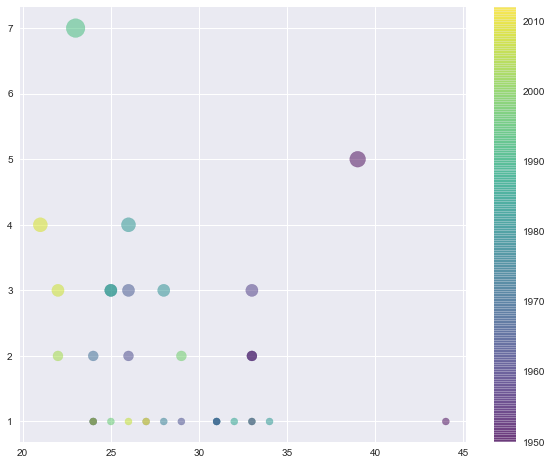

In [19]:
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
sc = plt.scatter(
    titles_data['first_win_age'],
    titles_data['count'],
    s=titles_data['count'] * 50,
    c=titles_data['first_win_year'],
    alpha=0.5,
    cmap=plt.cm.get_cmap('viridis')
)
plt.colorbar(sc);

На графике хорошо видно, большая часть чемпионских титулов была завоевана гонщиками одержавшими свои первые победы в возрасте до 30 лет. Они также являются и наиболее успешными гонщиками в истории чемпионата по количеству чемпионских титулов. Есть несколько исключений из этого правила, но они относятся к ранней истории чемпионата, когда средний возраст был намного выше.